# Движение под действием силы тяжести

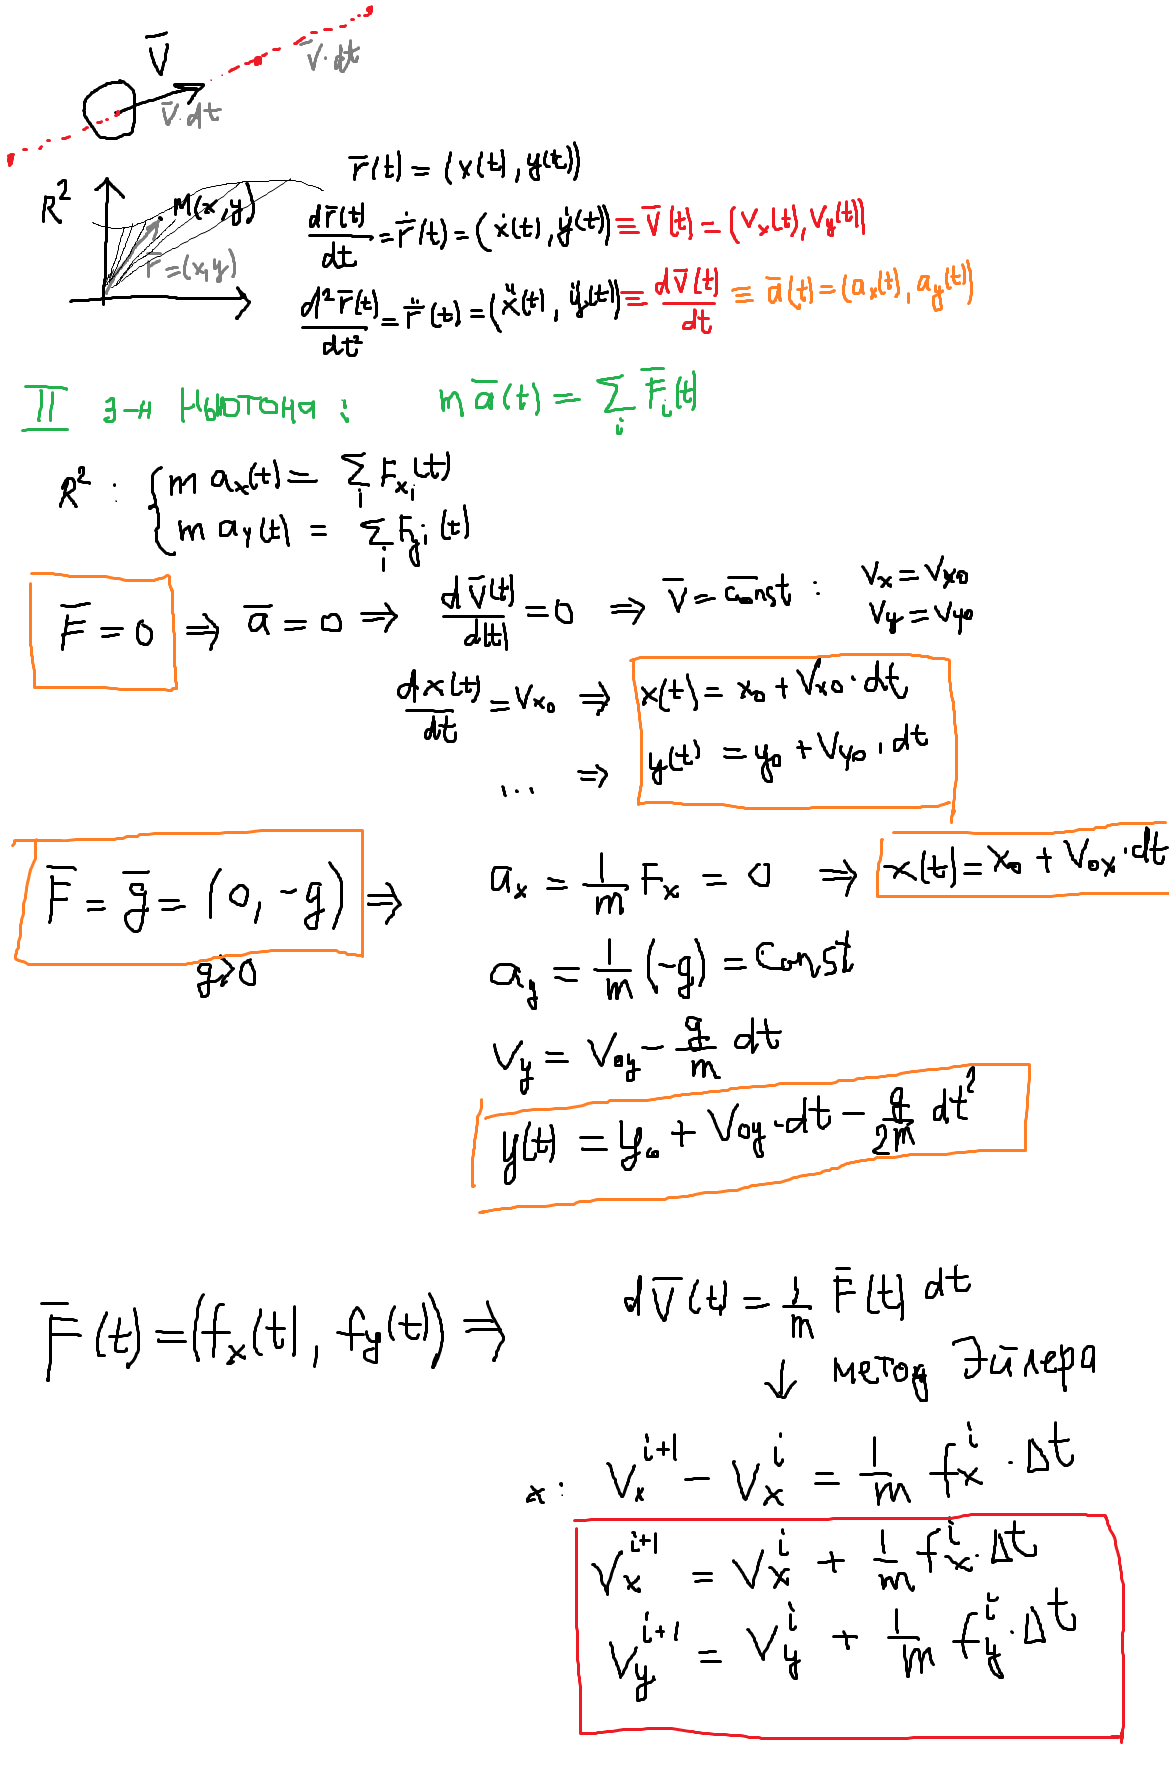

In [8]:
import random

class Particle():
    
    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity
        
    def move(self):
        
        self.velocity[0] += 1/self.mass * (g[0] * self.mass) * dt
        self.velocity[1] += 1/self.mass * (g[1] * self.mass) * dt
        
        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt
        
        # проверка столкновения с нижней стенкой
        D = height - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1
        # проверка столкновения с правой стенкой
        D = width - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1
        
    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position), 
                           self.radius, 2)
        
        
#######################################################

dt = .05
my_particles = []
num = 20
g = [0, .1]

for i in range(num):
    p = Particle(random.randint(10,30), random.randint(10,20), [420,240],
                 [random.uniform(-2,2),random.uniform(-2,2)])
    my_particles.append(p)

#######################################################

import pygame

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Прямолинейное движение частиц')

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    screen.fill(background_color)
    
    for i in my_particles:
        i.move()
        i.draw()
    
    pygame.display.flip()
    
pygame.quit()

## ДЗ

Смоделировать эластичный утар о стенку (т.е. во время удара будет теряться энергия [кинетическая энергия движения] и как следствие уменьшаться линейная скорость движения)

Шары со временем остановятся

In [5]:
import random
import pygame

k = 0.5
num = 20
dt = .05

class Particle():

    def __init__(self, radius, mass, position, velocity):
        self.radius = radius
        self.mass = mass
        self.position = position
        self.velocity = velocity

    def move(self):

        self.velocity[0] += 1/self.mass * (g[0] * self.mass) * dt
        self.velocity[1] += 1/self.mass * (g[1] * self.mass) * dt

        self.position[0] += self.velocity[0] * dt
        self.position[1] += self.velocity[1] * dt

        # проверка столкновения с нижней стенкой
        D = height - self.position[1]
        if D < self.radius:
            self.position[1] -= (self.radius - D)
            self.velocity[1] *= -1 * k
        # проверка столкновения с верхней стенкой
        D = self.position[1]
        if D < self.radius:
            self.position[1] += (self.radius - D)
            self.velocity[1] *= -1 * k
        # проверка столкновения с правой стенкой
        D = width - self.position[0]
        if D < self.radius:
            self.position[0] -= (self.radius - D)
            self.velocity[0] *= -1 * k
        # проверка столкновения с левой стенкой
        D = self.position[0]
        if D < self.radius:
            self.position[0] += (self.radius - D)
            self.velocity[0] *= -1 * k

    def draw(self):
        pygame.draw.circle(screen, (0,0,0), tuple(self.position),
                           self.radius, 2)


#######################################################


my_particles = []

g = [0, .1]

for i in range(num):
    p = Particle(random.randint(10,30), random.randint(10,20), [420,240],
                 [random.uniform(-2,2),random.uniform(-2,2)])
    my_particles.append(p)

#######################################################

background_color = (255,255,0)
(width, height) = (840, 480)

screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Прямолинейное движение частиц')

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    screen.fill(background_color)

    for i in my_particles:
        i.move()
        i.draw()

    pygame.display.flip()

pygame.quit()